# Modelos de Clustering

En este archivo se probaron distintos modelos de clustering con el objetivo de ver el comportamiento del dataset. Para la aplicación del modelo no se hizo una limpieza del dataset, utilizandose las siguientes variables independientes:**indice_turno, turno , inicio_turno , id_grupo , inicio_loginop , duracion_login , total_cargas , ttotal_cargas , ttotal_espera, ttotal_aculatamiento , contador_cargas , t_efectivo , t_noproductivo , t_demoraoperacional , t_reserva ,t_mantencionNP , t_inhabil , t_mantencionP.**

Se estableció como variable independiente (y) a las **toneladas totales.**

Los modelos usados fueron:
- KNN
- K means minibtach
- GMM
- Mean Shift
- DBSCAN
- Hierarchical CLustering

## Validación Modelos Clustering

**SILLHOUETTE-COEFFICIENT**

El coeficiente de silueta se calcula utilizando la distancia media dentro del grupo (a) y la distancia media más cercana al grupo (b) para cada muestra. El coeficiente de silueta para una muestra es (b - a) / max (a, b). Para aclarar, b es la distancia entre una muestra y el grupo más cercano del que la muestra no forma parte. Tenga en cuenta que el coeficiente de silueta solo se define si el número de etiquetas es 2 <= n_labels <= n_samples - 1.

- The best value is 1 and the worst value is -1. 
- Values near 0 indicate overlapping clusters. 
- Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


**CALINSKI-HARABASZ**

También se conoce como Criterio de relación de varianza. El puntaje se define como la relación entre la dispersión dentro del grupo y la dispersión entre grupos.

Hay algunas cosas que uno debe tener en cuenta.

- Como la mayoría de los criterios de agrupamiento interno, Calinski-Harabasz es un dispositivo heurístico. La forma correcta de usarlo es comparar las soluciones de agrupación obtenidas con los mismos datos, soluciones que difieren en la cantidad de agrupaciones o en el método de agrupación utilizado.

- No hay un valor de corte "aceptable". Simplemente compara los valores de CH a simple vista. Cuanto mayor sea el valor, "mejor" es la solución. Si en el diagrama lineal de los valores de CH parece que una solución da un pico o al menos un codo abrupto, elíjalo. Si, por el contrario, la línea es suave - horizontal o ascendente o descendente - entonces no hay razón para preferir una solución a otras.

- El criterio CH se basa en la ideología ANOVA. Por lo tanto, implica que los objetos agrupados se encuentran en el espacio euclidiano de variables de escala (no ordinales, binarias o nominales). Si los datos agrupados no fueran variables de objetos X sino una matriz de diferencias entre objetos, entonces la medida de disimilitud debería ser la distancia euclidiana (al cuadrado) (o, en el peor de los casos, otra distancia métrica que se aproxima a la distancia euclidiana por propiedades).

- El criterio CH es más adecuado en el caso de que los grupos sean más o menos esféricos y compactos en su medio (como, por ejemplo, normalmente distribuidos) 1

. En igualdad de condiciones, CH tiende a preferir soluciones de agrupación con agrupaciones que consisten en aproximadamente el mismo número de objetos.

## 1) Importar data 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [89]:
df = pd.read_excel('dataframe.xlsx', sheet_name='Hoja1')
df.shape

(120441, 41)

In [90]:
df.drop(columns=['tmcat08', 'tmcat09', 'tmcat10',
       'tmcat11', 'tmcat12', 'tmcat13', 'tmcat14', 'tmcat15', 'tmcat16',
       'tmcat17', 'tmcat18', 'tmcat19'],inplace=True)

In [91]:
df.shape

(120441, 29)

Se removieron las columnas a partir de tmcat08 debido a que no poseían valores reduciendo el dataset de 41 columnas a 29

In [92]:
df = df.rename(columns={'shiftdate':'Fecha_carga'})
df = df.rename(columns={'shiftindex':'indice_turno'})
df = df.rename(columns={'shift#':'turno'})
df = df.rename(columns={'start':'inicio_turno'})
df = df.rename(columns={'crew#':'id_grupo'})
df = df.rename(columns={'crew':'nom_grupo'})
df = df.rename(columns={'eqmtid':'id_equipo_operado'})
df = df.rename(columns={'logintime':'inicio_loginop'})
df = df.rename(columns={'locid':'lugar_operacion'})
df = df.rename(columns={'operid':'id_operador'})
df = df.rename(columns={'totaltime':'duracion_login'})
df = df.rename(columns={'pit':'area_mina'})
df = df.rename(columns={'unit#':'id_tipoeq'})
df = df.rename(columns={'unit':'glosa_tipoeq'})
df = df.rename(columns={'unit#':'id_tipoeq'})
df = df.rename(columns={'totalloads':'total_cargas'})
df = df.rename(columns={'totaltons':'total_tons'})
df = df.rename(columns={'loadtime':'ttotal_cargas'})
df = df.rename(columns={'idletime':'ttotal_espera'})
df = df.rename(columns={'spottime':'ttotal_aculatamiento'})
df = df.rename(columns={'loadcnt':'contador_cargas'})
df = df.rename(columns={'tmcat00':''})
df = df.rename(columns={'tmcat01':'t_efectivo'})
df = df.rename(columns={'tmcat02':'t_noproductivo'})
df = df.rename(columns={'tmcat03':'t_demoraoperacional'})
df = df.rename(columns={'tmcat04':'t_reserva'})
df = df.rename(columns={'tmcat05':'t_mantencionNP'})
df = df.rename(columns={'tmcat06':'t_inhabil'})
df = df.rename(columns={'tmcat07':'t_mantencionP'})

In [93]:
df.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', '', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

## 2) Definición de variables X

Para la aplicación de modelos de clustering se dejaron solamente las variables con valores numericos.

In [408]:
df.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', '', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

In [521]:
X=np.array(df[['indice_turno', 'turno', 'inicio_turno',
       'id_grupo','inicio_loginop',
        'duracion_login', 
        'total_cargas',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP','total_tons']])
X.shape

(120441, 19)

Debido a que muchas de las variables incluidas dentro del dataset contenian valores de texto o de tipo alfanumerico, se dejaron solo aquellas variables de tipo numerico para la aplicación de los modelos. Despues de haber seleccionado las variables utiles para los modelos, la X fue estandarizada.

# 3) Aplicación modelos Clustering

## 3.1) KNN

- “El objetivo de K-means es simple: **agrupar puntos de datos similares y descubrir patrones subyacentes. Para lograr este objetivo, K-means busca un número fijo (k) de grupos en un conjunto de datos ".**

- Un clúster se refiere a una colección de puntos de datos agregados juntos debido a ciertas similitudes.

- Definirá un número objetivo k, que se refiere a la cantidad de centroides que necesita en el conjunto de datos. Un centroide es la ubicación imaginaria o real que representa el centro del grupo.

- Cada punto de datos se asigna a cada uno de los grupos mediante la reducción de la suma de cuadrados en el grupo.

- En otras palabras, el algoritmo K-means identifica k número de centroides, y luego asigna cada punto de datos al grupo más cercano, mientras mantiene los centroides lo más pequeños posible

Para Este algoritmo funciona pre-seleccionando un valor de K. Para encontrar el número de clusters en los datos, deberemos ejecutar el algoritmo para un rango de valores K, ver los resultados y comparar características de los grupos obtenidos. 

Una de las métricas usada para comparar resultados es la **distancia media entre los puntos de datos y su centroide**. Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de descenso se “afila”.

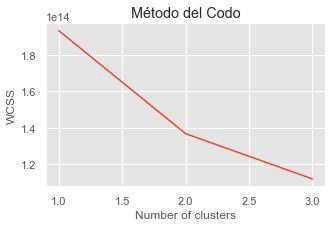

In [522]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
#Donde WCSS es la suma de los cuadrados de las distancias y se 
#refiere a Within-Cluster-Sum-of-Squares, Yi es el centroide 
#del elemento o dato Xi y n el total de datos en la muestra.
wcss = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 4), wcss)
plt.title('Método del Codo')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

En un principio se probó con un rango de 1 a 15, pero no se apreciaba bien el quiebre del codo por lo que se redujo de forma paulatina hasta tener una visión más clara. En base al gráfico nuestro número de clusters debiese ser 2.

In [523]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X.shape

(120441, 19)

Aplicamos el modelo posterior a haberlo importado

In [524]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2).fit(X)
km

KMeans(n_clusters=2)

Sacamos los centroides

In [525]:
#Sacamos los centroides para después visualizar el resultado.
#code for finding the center of the clusters
centroids = km.cluster_centers_
centroids

array([[-5.94816879e-03, -8.17325616e-04, -1.79355598e-03,
         2.56616641e-03,  3.06845888e-02, -1.08940289e-01,
        -2.72817678e-01, -2.79386863e-01, -1.98277837e-01,
        -2.53930530e-01, -2.72817678e-01, -2.60932978e-01,
        -1.41685414e-03, -8.93924561e-02,  3.34738715e-02,
         6.36795044e-02,  7.03990221e-03,  2.29405272e-02,
        -2.72654693e-01],
       [ 3.75783758e-02,  5.16356718e-03,  1.13310370e-02,
        -1.62121099e-02, -1.93854117e-01,  6.88245282e-01,
         1.72356326e+00,  1.76506500e+00,  1.25264755e+00,
         1.60424110e+00,  1.72356326e+00,  1.64848003e+00,
         8.95117123e-03,  5.64749156e-01, -2.11475795e-01,
        -4.02304042e-01, -4.44755521e-02, -1.44929941e-01,
         1.72253359e+00]])

Los centroides tienen 2 dimensiones y cada dimension posee 20 elementos

In [526]:
centroids.shape

(2, 19)

In [527]:
#Here is the code for getting the labels property of the 
#K-means clustering example dataset; 
#that is, how the data points are categorized into the two clusters.
km.labels_

array([0, 0, 1, ..., 0, 1, 0])

In [528]:
#Number of iterations run.
km.n_iter_ 

7

In [529]:
#code below for predicting the cluster of a data point:
predicciones=km.predict(X)
predicciones

array([0, 0, 1, ..., 0, 1, 0])

Calcularemos la matriz de distancias entre un vector array X y una Y, en este caso nuestra X serian los centroides y nuestra Y serian los valores de X. Asi calculariamos la distancia entre los centroides y los puntos del dataset.

In [530]:
dist=sklearn.metrics.pairwise_distances(centroids,X)
dist

array([[3.87354568, 2.8191003 , 4.56582272, ..., 3.10851391, 4.26054024,
        3.00251169],
       [6.25896228, 6.12750978, 3.22525171, ..., 6.19050804, 3.51362251,
        6.2406315 ]])

Buscaremos los registros que están más cerca a los centroides de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster

In [531]:
closest, _ =sklearn.metrics.pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([119905, 114724, 120022], dtype=int64)

In [532]:
represent=df['indice_turno'].values
represent.shape
represent
for row in closest:
    print(represent[row])

37023
36984
37025


In [533]:
df_indice=df[df.indice_turno==37025]
df_indice['total_tons'].describe().transpose

<bound method IndexOpsMixin.transpose of count      131.000000
mean      1297.480916
std       2811.240773
min          0.000000
25%          0.000000
50%          0.000000
75%        552.000000
max      18562.000000
Name: total_tons, dtype: float64>

In [534]:
df_indice=df[df.indice_turno==37023]
df_indice['total_tons'].describe().transpose

<bound method IndexOpsMixin.transpose of count      124.000000
mean      1548.741935
std       4513.415068
min          0.000000
25%          0.000000
50%          0.000000
75%        213.250000
max      36800.000000
Name: total_tons, dtype: float64>

In [535]:
dist=sklearn.metrics.pairwise_distances(kmeans.cluster_centers_, X)
dist.shape

(3, 120441)

In [536]:
X.shape

(120441, 19)

In [537]:
centroids.shape

(2, 19)

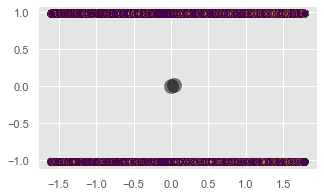

In [538]:
plt.scatter(X[:, 0], X[:, 1], c=predicciones, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)

In [449]:
df.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', '', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

In [539]:
print("Validación Modelo: K-means")
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X,labels_pred))

Validación Modelo: K-means
Silhouette Coefficient: -0.062
Calinski-Harabasz Index: 1236.567


Posterior a haber aplicado el modelo KNN al dataset llegamos a algunas conclusiones:
- 1) Debemos reducir la dimension del dataset para poder obtener información más valiosa del comportamiento de los clusters ya que al tener tantas dimensiones, graficar los puntos para apreciar visualmente los clusters fue imposible.(ni el montaño se la pudo)
- 2) A pesar de no obtener una representación visual clara, obtuvimos aquellos puntos que se encontaban mas cercanos a los centroides de cada cluster, por lo que identificando estos puntos y entendiendo de que estos son los más representativos de cada cluster, podemos obtener información que puede aportar a la gestión.
- 3) Según el método del codo obtuvimos 2 clusters, pero a pesar de esto, obtuvimos 3 datos cuya cercanía con los centroides los hace mas representativos. ¿Cómo hay 3 puntos representativos de 2 clusters?,¿Como se distribuyen?
- 4) En base a las métricas, el coeficiente de silueta nos indica clusters que se sobreponen (debido a su valor 0,332 cercano a cero) lo que también explicaría el comportamiento de los puntos representativos.

# 3.2) K-means Mini Batch

La idea principal del algoritmo Mini Batch K-means es utilizar pequeños lotes aleatorios de datos de un tamaño fijo, para que puedan almacenarse en la memoria. En cada iteración, se obtiene una nueva muestra aleatoria del conjunto de datos y se utiliza para actualizar los grupos y esto se repite hasta la convergencia. Cada mini lote actualiza los clústeres utilizando una combinación convexa de los valores de los prototipos y los datos, aplicando una tasa de aprendizaje que disminuye con el número de iteraciones. Esta tasa de aprendizaje es la inversa del número de datos asignados a un grupo durante el proceso. A medida que aumenta el número de iteraciones, se reduce el efecto de los nuevos datos, por lo que se puede detectar la convergencia cuando no se producen cambios en los clústeres en varias iteraciones consecutivas.


https://www.geeksforgeeks.org/ml-mini-batch-k-means-clustering-algorithm/

In [466]:
X

array([[-1.59768877,  0.97195592,  0.96432422, ..., -0.32252152,
        -0.1478495 , -0.11286553],
       [-1.59768877,  0.97195592,  0.96432422, ..., -0.32252152,
        -0.1478495 , -0.26239769],
       [-1.59768877,  0.97195592,  0.96432422, ...,  0.09890589,
        -0.1478495 ,  1.08371824],
       ...,
       [ 1.78790923,  0.97195592,  0.96432422, ..., -0.32252152,
        -0.1478495 , -0.33749026],
       [ 1.78790923,  0.97195592,  0.96432422, ..., -0.00795537,
        -0.1478495 ,  0.98185354],
       [ 1.78790923,  0.97195592,  0.96432422, ..., -0.32252152,
        -0.1478495 , -0.33749026]])

Usamos la misma variable X que usamos en KNN, para efectos de comparar las métricas de evaluación de los modelos.

In [476]:
from sklearn.cluster import MiniBatchKMeans
kmmini = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=500).fit(X)
kmmini

MiniBatchKMeans(batch_size=500, n_clusters=2, random_state=0)

In [474]:
predicciones_mini=kmmini.predict(X)
predicciones_mini

array([0, 0, 0, ..., 0, 0, 0])

In [478]:
kmmini.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [480]:
kmmini.inertia_

2053416.0372112049

In [470]:
centroides_mini=kmmini.cluster_centers_
centroides_mini

array([[ 4.15950181e-03,  3.61059878e-03,  4.34620290e-03,
        -7.70125052e-03, -2.21470823e-03, -2.26343633e-02,
        -1.43271873e-01, -1.40655204e-01, -5.73706263e-02,
        -1.35909970e-01, -1.43271873e-01, -2.26343633e-02,
        -5.13394388e-02,  9.14507911e-04, -9.17509814e-03,
        -8.03247249e-03,  1.99206982e-02, -6.85420966e-04,
         1.51931963e-02, -1.43263648e-01],
       [ 3.60846657e-02, -4.50038238e-02, -4.72785371e-02,
         4.79242192e-02, -4.10807199e-02,  4.25222441e-01,
         3.92278002e+00,  3.94473367e+00,  1.37836097e+00,
         3.61376532e+00,  3.92278002e+00,  4.25222441e-01,
         1.41408066e+00, -6.22730054e-03,  4.88940987e-01,
        -3.18289588e-01, -4.02274874e-01, -9.84708935e-02,
        -1.34848554e-01,  3.91265964e+00]])

In [472]:
labels_pred=predicciones_mini

In [473]:
print("Validación Modelo: K-means mini batch")
from sklearn import metrics
#Validación Modelo
#print('Estimated number of clusters: %d' % n_clusters)
#print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X,labels_pred))

Validación Modelo: K-means mini batch
Silhouette Coefficient: 0.516
Calinski-Harabasz Index: 20867.542


# 3.3) GMM

Un modelo de mezcla gaussiana (GMM) intenta encontrar una mezcla de distribuciones de probabilidad gaussianas multidimensionales que modelen mejor cualquier conjunto de datos de entrada. En el caso más simple, los GMM se pueden usar para encontrar clústeres de la misma manera que k-means

In [29]:
from sklearn.mixture import GaussianMixture

In [30]:
gmm = GaussianMixture(n_components=2).fit(X)
predicciones_gmm=gmm.predict(X)
predicciones_gmm

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

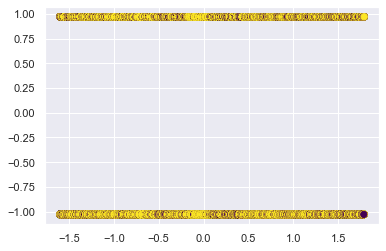

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=predicciones_gmm, s=40, cmap='viridis');

In [490]:
labels_pred=predicciones_gmm

print("Validación Modelo: GMM")
from sklearn import metrics

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X,labels_pred))

Validación Modelo: GMM
Silhouette Coefficient: 0.182
Calinski-Harabasz Index: 15322.395


# 3.4) Mean Shift

Observa el "modo" de la densidad, y dónde es más alto, y cambiará iterativamente los puntos en el gráfico hacia el modo más cercano, lo que da como resultado una cantidad de grupos y la capacidad de asignar una muestra a un grupo, después de ajustar está completo (ML | agrupación de turnos medios, 2019).

De esta manera, incluso cuando sus clústeres no estén perfectamente separados, Mean Shift probablemente podrá detectarlos de todos modos (Scikit-learn, n.d.).

Cuando su conjunto de datos es relativamente pequeño, Mean Shift funciona bastante bien (Scikit-learn, n.d.). Esto cambia cuando tienes uno grande, porque el algoritmo es bastante caro, por decir lo menos. Sería aconsejable usar Mean Shift solo para conjuntos de datos de tamaño pequeño a mediano.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [492]:
#Mean Shift con bandwidth
#Estimamos el bandwidth
#bandwidth_a = estimate_bandwidth(X, quantile=0.2)
#bandwidth_a=10

In [38]:
#meanshift = MeanShift(bandwidth=bandwidth_a).fit(X)
#meanshift

In [39]:
#predicciones_ms = meanshift.predict(X)
#predicciones_ms

In [40]:
#ms = MeanShift().fit(X)
#centroides_ms = meanshift.cluster_centers_
#centroides_ms

In [41]:
#plt.scatter(X[:, 0], X[:, 1], c=predicciones_ms, s=40, cmap='viridis');
#plt.scatter(centroides_ms[:, 0], centroides_ms[:, 1], c='black', s=200, alpha=0.5);

In [42]:
#labels_true=y
#labels_pred=predicciones_ms

#from sklearn.metrics.cluster import contingency_matrix
#contingency_matrix(labels_true,labels_pred)

#print("Validación Modelo: Mean Shift con bandwidth")
#from sklearn import metrics
#Validación Modelo
#print('Estimated number of clusters: %d' % n_clusters)
#print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred))
#print("Fowlkes-Mallows: %0.3f" % metrics.fowlkes_mallows_score(labels_true,labels_pred))
#print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X,labels_pred))

Debido al considerable tamaño del dataset, no se usó este modelo aun ya que no se hizo una limpieza de los datos

# 3.5) DBSCAN

DBSCAN es un algoritmo de machine learning diseñado para detectar en forma automática “clusters”, es decir elementos próximos entre si de acuerdo a sus atributos en varias dimensiones.

A diferencia de otros algoritmos de clustering como KMeans, DBSCAN resulta muy adecuado para buscar patrones de agrupación en el espacio físico. Por ejemplo, en la distribución espacial de actividades humanas.

In [493]:
from sklearn.cluster import DBSCAN
import sklearn.utils

In [495]:
db = DBSCAN(eps=0.5, min_samples=25).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db

DBSCAN(min_samples=25)

In [496]:
labels=db.labels_
labels

array([ 0,  0, -1, ...,  0, -1,  0], dtype=int64)

In [497]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

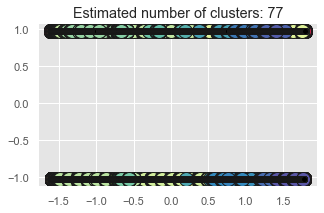

In [498]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0, 0.5, 'Feature 1')

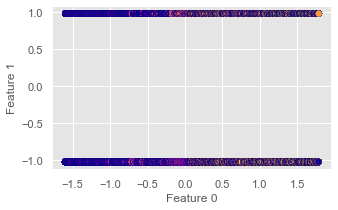

In [501]:
dbscan = DBSCAN(eps=0.123, min_samples = 25)
clusters = dbscan.fit_predict(X)# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [502]:
labels_pred=labels

from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels_true,labels_pred)

print("Validación Modelo: DBSCAN")
from sklearn import metrics

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X,labels_pred))

Validación Modelo: DBSCAN
Silhouette Coefficient: -0.056
Calinski-Harabasz Index: 1330.030


# 3.6) Hierarchical Clustering

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120441 entries, 0 to 120440
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    120441 non-null  int32         
 1   Fecha_carga           120441 non-null  datetime64[ns]
 2   indice_turno          120441 non-null  int32         
 3   turno                 120441 non-null  int32         
 4   inicio_turno          120441 non-null  int32         
 5   id_grupo              120441 non-null  int32         
 6   nom_grupo             120441 non-null  object        
 7   id_equipo_operado     120441 non-null  object        
 8   inicio_loginop        120441 non-null  int32         
 9   lugar_operacion       120441 non-null  object        
 10  id_operador           120441 non-null  object        
 11  duracion_login        120441 non-null  int32         
 12  area_mina             120441 non-null  object        
 13 

In [570]:
df.ID = df.ID.astype(int)
df.indice_turno = df.indice_turno.astype(int)
df.turno = df.turno.astype(int)
df.inicio_turno = df.inicio_turno.astype(int)
df.id_grupo = df.id_grupo.astype(int)
df.inicio_loginop = df.inicio_loginop.astype(int)
df.duracion_login = df.duracion_login.astype(int)
df.total_cargas = df.total_cargas.astype(int)
df.ttotal_cargas = df.ttotal_cargas.astype(int)
df.ttotal_espera = df.ttotal_espera.astype(int)
df.ttotal_aculatamiento = df.ttotal_aculatamiento.astype(int)
df.contador_cargas = df.contador_cargas.astype(int)
df.t_efectivo = df.t_efectivo.astype(int)
df.t_noproductivo = df.t_noproductivo.astype(int)
df.t_demoraoperacional = df.t_demoraoperacional.astype(int)
df.t_reserva = df.t_reserva.astype(int)
df.t_mantencionNP = df.t_mantencionNP.astype(int)
df.t_inhabil = df.t_inhabil.astype(int)
df.t_mantencionP = df.t_mantencionP.astype(int)
df.total_tons = df.total_tons.astype(int)

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120441 entries, 0 to 120440
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    120441 non-null  int32         
 1   Fecha_carga           120441 non-null  datetime64[ns]
 2   indice_turno          120441 non-null  int32         
 3   turno                 120441 non-null  int32         
 4   inicio_turno          120441 non-null  int32         
 5   id_grupo              120441 non-null  int32         
 6   nom_grupo             120441 non-null  object        
 7   id_equipo_operado     120441 non-null  object        
 8   inicio_loginop        120441 non-null  int32         
 9   lugar_operacion       120441 non-null  object        
 10  id_operador           120441 non-null  object        
 11  duracion_login        120441 non-null  int32         
 12  area_mina             120441 non-null  object        
 13 

In [572]:
X=df[['total_cargas',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', 't_efectivo']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120441 entries, 0 to 120440
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   total_cargas          120441 non-null  int32
 1   ttotal_cargas         120441 non-null  int32
 2   ttotal_espera         120441 non-null  int32
 3   ttotal_aculatamiento  120441 non-null  int32
 4   contador_cargas       120441 non-null  int32
 5   t_efectivo            120441 non-null  int32
dtypes: int32(6)
memory usage: 2.8 MB


In [573]:
X

,total_cargas,ttotal_cargas,ttotal_espera,ttotal_aculatamiento,contador_cargas,t_efectivo
0,3,532,262,337,3,5784
1,1,0,0,0,1,0
2,19,2896,1443,1334,19,29034
3,0,0,0,0,0,8
4,19,5016,171,1744,19,30466
...,...,...,...,...,...,...
120436,0,0,0,0,0,0
120437,18,2666,410,482,18,29163
120438,0,0,0,0,0,13
120439,18,2975,933,557,18,28095


In [576]:
from sklearn.preprocessing import normalize
X = normalize(X)
X

array([[-0.34961282, -0.44665762, -0.53188318,  0.33311496, -0.34961282,
        -0.40270763],
       [-0.3021062 , -0.40325448, -0.28379818, -0.35871302, -0.3021062 ,
        -0.66755754],
       [ 0.3946762 ,  0.28123928,  0.06289938,  0.48522565,  0.3946762 ,
         0.60824797],
       ...,
       [-0.36766225, -0.38134309, -0.26837761, -0.33922186, -0.36766225,
        -0.63018122],
       [ 0.43522665,  0.34625571,  0.01090119,  0.16232549,  0.43522665,
         0.68905305],
       [-0.36740658, -0.38107791, -0.26819099, -0.33898596, -0.36740658,
        -0.6308459 ]])

AttributeError: module 'scipy.cluster.hierarchy' has no attribute 'dendogram'

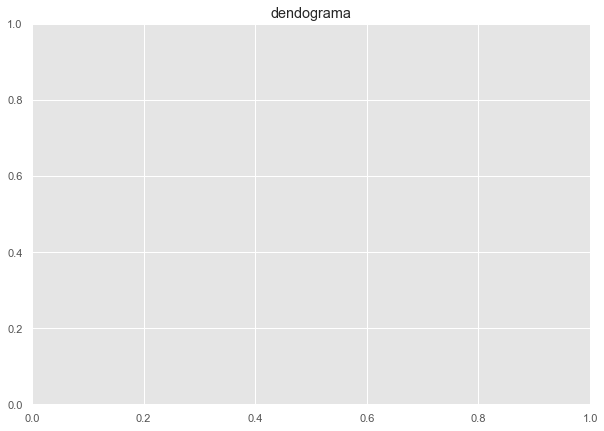

In [578]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("dendograma")
dend=shc.dendogram(shc.linkage(X,method='ward'))

In [579]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

MemoryError: Unable to allocate 54.0 GiB for an array with shape (7252957020,) and data type float64

In [575]:
#Hierarchical clustering
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('puntos')
plt.ylabel('Euclidean distance')
plt.show()

MemoryError: Unable to allocate 54.0 GiB for an array with shape (7252957020,) and data type float64

In [559]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(X)
clustering

MemoryError: Unable to allocate 54.0 GiB for an array with shape (7252957020,) and data type float64

In [560]:
prediccion_hc = clustering.labels_
prediccion_hc

NameError: name 'clustering' is not defined

In [ ]:
plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='viridis')

In [ ]:
#print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, prediccion_hc))
print("Completeness: %0.3f" % metrics.completeness_score(y, prediccion_hc))
print("V-measure: %0.3f" % metrics.v_measure_score(y, prediccion_hc))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, prediccion_hc))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, prediccion_hc))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, Y))